<a href="https://colab.research.google.com/github/EugeneStrakhov86/it-in-analytics-fall-2018/blob/master/Pandas_in_action_(dou_ua)_(Apr_01_22%2C_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Зчитування даних: `read_csv()`

Документація: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

Основні параметри:

* `sep` (роздільник комірок, за замовчуванням --- кома)
* `header` (за замовчуванням =0, тобто перший рядок файлу вважається заголовком)
* `index_col` (номер стовпця, який необхідно використовувати як індекс, тобто "імена рядків")
* `encoding` (кодування, за замовчуванням utf-8)
* `parse_dates` (список колонок, які потрібно розпізнати як дати)
* `na_values` (особливі значення в таблиці, які потрібно сприймати як пропуски в даних)

## Спосіб 1. Простий

Попробуємо прочитати дані, вказавши лише роздільник між комірками таблиці.

In [ ]:
path = "/content/drive/MyDrive/IT in Analytics/Python/Spring 2023/2022_dec_raw.csv"
dou = pd.read_csv(path, sep=';')
dou.head()

,Timestamp,Ви працюєте зараз в ІТ?,Де ви зараз живете?,В якій області ви зараз живете?,"Зарплата у $$$ за місяць, лише ставка після сплати податків",Ваша стать,Ваш вік,Яка у вас освіта?,Чи є у вас науковий ступінь?,Знання англійської мови,...,Ваша посада4,Ваша посада5,Ваша посада6,Ваша посада7,Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?,Основна мова програмування,Вкажіть вашу основну спеціалізацію,В якій сфері працюєте?,Тип компанії,Загальний стаж роботи за спеціальністю
0,11.30.2022 10:26:37,"Так, працюю part-time",В Україні,Івано-Франківськ чи область,4000,Чоловік,29,"Вища (бакалавр, спеціаліст, магістр)",Немає,Intermediate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blockchain,Стартап,8 років
1,11.30.2022 10:26:39,"Так, працюю full-time","За кордоном (переїхали через війну, але планую...",NaN,NaN,Чоловік,36,"Вища (бакалавр, спеціаліст, магістр)",Немає,Advanced,...,NaN,NaN,NaN,NaN,NaN,Ruby,Full Stack розробка,Public services / Government,Продуктова,3 роки
2,11.30.2022 10:26:58,"Так, працюю full-time",В Україні,Київ чи область,2500,Чоловік,34,"Вища (бакалавр, спеціаліст, магістр)",Немає,Elementary,...,NaN,NaN,NaN,NaN,NaN,C# / .NET,Full Stack розробка,"Adtech / Advertising, Security, Telecom",Продуктова,4 роки
3,11.30.2022 10:27:31,"Так, працюю full-time",В Україні,Львів чи область,500,Жінка,23,"Вища (бакалавр, спеціаліст, магістр)",Немає,Pre-Intermediate,...,NaN,NaN,NaN,NaN,"Ні, не використовую",NaN,NaN,Telecom,Продуктова,Пів року
4,11.30.2022 10:27:34,"Ні, тимчасово не працюю",В Україні,Житомир чи область,2800,Жінка,33,"Вища (бакалавр, спеціаліст, магістр)",Немає,Upper-Intermediate,...,NaN,NaN,NaN,NaN,"Ні, не використовую",NaN,NaN,Automotive,Продуктова,6 років


Метод `info()` дозволяє отримати базову інформацію про датасет:
* кількість рядків
* кількість колонок
* індекс
* назви колонок
* тип даних у колонках
* наявність пропусків (null-значень)

In [ ]:
dou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13315 entries, 0 to 13314
Data columns (total 28 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Timestamp                                                                   13315 non-null  object
 1   Ви працюєте зараз в ІТ?                                                     13315 non-null  object
 2   Де ви зараз живете?                                                         13315 non-null  object
 3   В якій області ви зараз живете?                                             11538 non-null  object
 4   Зарплата у $$$ за місяць, лише ставка після сплати податків                 13288 non-null  object
 5   Ваша стать                                                                  13315 non-null  object
 6   Ваш вік                                               

## Спосіб 2. Розширений

В якості індексу рядків можемо використати дату та час заповнення анкети (перша колонка таблиці). Потрібно розпізнати у `read_csv()` її як дату.

In [ ]:
path = "/content/drive/MyDrive/IT in Analytics/Python/Spring 2023/2022_dec_raw.csv"
dou = pd.read_csv(path, sep=';', index_col=0, parse_dates=True)
dou.head()

,Ви працюєте зараз в ІТ?,Де ви зараз живете?,В якій області ви зараз живете?,"Зарплата у $$$ за місяць, лише ставка після сплати податків",Ваша стать,Ваш вік,Яка у вас освіта?,Чи є у вас науковий ступінь?,Знання англійської мови,Оберіть вашу посаду,...,Ваша посада4,Ваша посада5,Ваша посада6,Ваша посада7,Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?,Основна мова програмування,Вкажіть вашу основну спеціалізацію,В якій сфері працюєте?,Тип компанії,Загальний стаж роботи за спеціальністю
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-11-30 10:26:37,"Так, працюю part-time",В Україні,Івано-Франківськ чи область,4000,Чоловік,29,"Вища (бакалавр, спеціаліст, магістр)",Немає,Intermediate,"Designer / Artist (Graphic, UX/UI, Game, Artis...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blockchain,Стартап,8 років
2022-11-30 10:26:39,"Так, працюю full-time","За кордоном (переїхали через війну, але планую...",NaN,NaN,Чоловік,36,"Вища (бакалавр, спеціаліст, магістр)",Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",...,NaN,NaN,NaN,NaN,NaN,Ruby,Full Stack розробка,Public services / Government,Продуктова,3 роки
2022-11-30 10:26:58,"Так, працюю full-time",В Україні,Київ чи область,2500,Чоловік,34,"Вища (бакалавр, спеціаліст, магістр)",Немає,Elementary,"Software Engineer (Junior, Middle, Senior, Tea...",...,NaN,NaN,NaN,NaN,NaN,C# / .NET,Full Stack розробка,"Adtech / Advertising, Security, Telecom",Продуктова,4 роки
2022-11-30 10:27:31,"Так, працюю full-time",В Україні,Львів чи область,500,Жінка,23,"Вища (бакалавр, спеціаліст, магістр)",Немає,Pre-Intermediate,"QA Engineer (Junior, Middle, Senior, Team/Tech...",...,NaN,NaN,NaN,NaN,"Ні, не використовую",NaN,NaN,Telecom,Продуктова,Пів року
2022-11-30 10:27:34,"Ні, тимчасово не працюю",В Україні,Житомир чи область,2800,Жінка,33,"Вища (бакалавр, спеціаліст, магістр)",Немає,Upper-Intermediate,"QA Engineer (Junior, Middle, Senior, Team/Tech...",...,NaN,NaN,NaN,NaN,"Ні, не використовую",NaN,NaN,Automotive,Продуктова,6 років


In [ ]:
dou.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13315 entries, 2022-11-30 10:26:37 to 2023-01-09 11:38:00
Data columns (total 27 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Ви працюєте зараз в ІТ?                                                     13315 non-null  object
 1   Де ви зараз живете?                                                         13315 non-null  object
 2   В якій області ви зараз живете?                                             11538 non-null  object
 3   Зарплата у $$$ за місяць, лише ставка після сплати податків                 13288 non-null  object
 4   Ваша стать                                                                  13315 non-null  object
 5   Ваш вік                                                                     13315 non-null  object
 6   Яка у вас освіта?  

Виявилось, що числові колонки (зарплата та вік) не були розпізнані як числа. З'ясуємо, чому. Для цього додамо у `read_csv()` параметр `dtype` та вкажемо тип певних колонок в явному вигляді.

In [ ]:
path = "/content/drive/MyDrive/IT in Analytics/Python/Spring 2023/2022_dec_raw.csv"
dou = pd.read_csv(path, sep=';', index_col=0, parse_dates=True, 
                  dtype={'Зарплата у $$$ за місяць, лише ставка після сплати податків': np.float64,
                         'Ваш вік': np.float64})
dou.head()

ValueError: ignored

Бачимо, що цілу та дробну частину розділяє кома. Додамо ще один параметр `decimal`, який відповідає за тип роздільника між цілою та дробною частинами.

In [ ]:
path = "/content/drive/MyDrive/IT in Analytics/Python/Spring 2023/2022_dec_raw.csv"
dou = pd.read_csv(path, sep=';', index_col=0, parse_dates=True, decimal=','
                  #dtype={'Зарплата у $$$ за місяць, лише ставка після сплати податків': np.float64,
                         #'Ваш вік': np.float64}
                  )
dou.head()

,Ви працюєте зараз в ІТ?,Де ви зараз живете?,В якій області ви зараз живете?,"Зарплата у $$$ за місяць, лише ставка після сплати податків",Ваша стать,Ваш вік,Яка у вас освіта?,Чи є у вас науковий ступінь?,Знання англійської мови,Оберіть вашу посаду,...,Ваша посада4,Ваша посада5,Ваша посада6,Ваша посада7,Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?,Основна мова програмування,Вкажіть вашу основну спеціалізацію,В якій сфері працюєте?,Тип компанії,Загальний стаж роботи за спеціальністю
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-11-30 10:26:37,"Так, працюю part-time",В Україні,Івано-Франківськ чи область,4000.0,Чоловік,29.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Intermediate,"Designer / Artist (Graphic, UX/UI, Game, Artis...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blockchain,Стартап,8 років
2022-11-30 10:26:39,"Так, працюю full-time","За кордоном (переїхали через війну, але планую...",NaN,NaN,Чоловік,36.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",...,NaN,NaN,NaN,NaN,NaN,Ruby,Full Stack розробка,Public services / Government,Продуктова,3 роки
2022-11-30 10:26:58,"Так, працюю full-time",В Україні,Київ чи область,2500.0,Чоловік,34.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Elementary,"Software Engineer (Junior, Middle, Senior, Tea...",...,NaN,NaN,NaN,NaN,NaN,C# / .NET,Full Stack розробка,"Adtech / Advertising, Security, Telecom",Продуктова,4 роки
2022-11-30 10:27:31,"Так, працюю full-time",В Україні,Львів чи область,500.0,Жінка,23.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Pre-Intermediate,"QA Engineer (Junior, Middle, Senior, Team/Tech...",...,NaN,NaN,NaN,NaN,"Ні, не використовую",NaN,NaN,Telecom,Продуктова,Пів року
2022-11-30 10:27:34,"Ні, тимчасово не працюю",В Україні,Житомир чи область,2800.0,Жінка,33.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Upper-Intermediate,"QA Engineer (Junior, Middle, Senior, Team/Tech...",...,NaN,NaN,NaN,NaN,"Ні, не використовую",NaN,NaN,Automotive,Продуктова,6 років


In [ ]:
dou.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13315 entries, 2022-11-30 10:26:37 to 2023-01-09 11:38:00
Data columns (total 27 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Ви працюєте зараз в ІТ?                                                     13315 non-null  object 
 1   Де ви зараз живете?                                                         13315 non-null  object 
 2   В якій області ви зараз живете?                                             11538 non-null  object 
 3   Зарплата у $$$ за місяць, лише ставка після сплати податків                 13288 non-null  float64
 4   Ваша стать                                                                  13315 non-null  object 
 5   Ваш вік                                                                     13315 non-null  float64
 6   Яка у вас о

# Попередня обробка даних (preprocessing)

## Перейменування колонок

Подивимось, чи є зайві пробіли у назвах стовпчиків.

In [ ]:
dou.columns

Index(['Ви працюєте зараз в ІТ?', 'Де ви зараз живете? ',
       'В якій області ви зараз живете?',
       'Зарплата у $$$ за місяць, лише ставка після сплати податків',
       'Ваша стать', 'Ваш вік', 'Яка у вас освіта?',
       'Чи є у вас науковий ступінь? ', 'Знання англійської мови',
       'Оберіть вашу посаду', 'Ваш тайтл', 'Ваша спеціалізація',
       'Вкажіть вашу спеціалізацію', 'Оберіть вашу спеціалізацію',
       'Ваша посада', 'Оберіть вашу посаду2', 'Ваша посада3', 'Ваша посада4',
       'Ваша посада5', 'Ваша посада6', 'Ваша посада7',
       'Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?',
       'Основна мова програмування', 'Вкажіть вашу основну спеціалізацію',
       'В якій сфері працюєте?', 'Тип компанії',
       'Загальний стаж роботи за спеціальністю'],
      dtype='object')

Є зайві пробіли. Видаляємо їх за допомогою методу `strip()` класу `str`.

In [ ]:
dou.columns = dou.columns.str.strip()

In [ ]:
dou.columns

Index(['Ви працюєте зараз в ІТ?', 'Де ви зараз живете?',
       'В якій області ви зараз живете?',
       'Зарплата у $$$ за місяць, лише ставка після сплати податків',
       'Ваша стать', 'Ваш вік', 'Яка у вас освіта?',
       'Чи є у вас науковий ступінь?', 'Знання англійської мови',
       'Оберіть вашу посаду', 'Ваш тайтл', 'Ваша спеціалізація',
       'Вкажіть вашу спеціалізацію', 'Оберіть вашу спеціалізацію',
       'Ваша посада', 'Оберіть вашу посаду2', 'Ваша посада3', 'Ваша посада4',
       'Ваша посада5', 'Ваша посада6', 'Ваша посада7',
       'Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?',
       'Основна мова програмування', 'Вкажіть вашу основну спеціалізацію',
       'В якій сфері працюєте?', 'Тип компанії',
       'Загальний стаж роботи за спеціальністю'],
      dtype='object')

Тепер виконуємо перейменування за допомогою методу `rename()`. Для цього потрібно створити словник (mapper), ключами якого є старі назви колонок, а значеннями --- нові назви.

In [ ]:
mapper = {
    'Ви працюєте зараз в ІТ?': 'employment_type',
    'Де ви зараз живете?': 'city',
    'В якій області ви зараз живете?': 'region',
    'Зарплата у $$$ за місяць, лише ставка після сплати податків': 'salary',
    'Ваша стать': 'gender',
    'Ваш вік': 'age',
    'Яка у вас освіта?': 'education',
    'Чи є у вас науковий ступінь?': 'scientific_degree',
    'Знання англійської мови': 'english_level',
    'Ваш тайтл': 'title',
    'Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?': 'use_code',
    'Основна мова програмування': 'programming_language',
    'В якій сфері працюєте?': 'area',
    'Тип компанії': 'company_type',
    'Загальний стаж роботи за спеціальністю': 'work_experience'
}

In [ ]:
dou = dou.rename(columns=mapper)

In [ ]:
dou.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13315 entries, 2022-11-30 10:26:37 to 2023-01-09 11:38:00
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   employment_type                     13315 non-null  object 
 1   city                                13315 non-null  object 
 2   region                              11538 non-null  object 
 3   salary                              13288 non-null  float64
 4   gender                              13315 non-null  object 
 5   age                                 13315 non-null  float64
 6   education                           13315 non-null  object 
 7   scientific_degree                   13204 non-null  object 
 8   english_level                       13315 non-null  object 
 9   Оберіть вашу посаду                 13315 non-null  object 
 10  title                               13315 non-null  object 
 11  Ваша с

## Трансформування даних. Робота із пропущеними значеннями

Розберемося із групами колонок "посада" та "спеціалізація". Бачимо, що в них є певне дублювання. 

Зробимо зріз датасету за колонками, які містять посаду. Для цього знадобиться метод `concat()`, який з'єднує датафрейми (по горизонталі або по вертикалі).

Документація та приклади: https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [ ]:
positions = pd.concat([dou['Оберіть вашу посаду'], dou.loc[:, 'Ваша посада':'Ваша посада7']], axis=1)

In [ ]:
positions.head()

,Оберіть вашу посаду,Ваша посада,Оберіть вашу посаду2,Ваша посада3,Ваша посада4,Ваша посада5,Ваша посада6,Ваша посада7
Timestamp,,,,,,,,
2022-11-30 10:26:37,"Designer / Artist (Graphic, UX/UI, Game, Artis...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 10:26:39,"Software Engineer (Junior, Middle, Senior, Tea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 10:26:58,"Software Engineer (Junior, Middle, Senior, Tea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 10:27:31,"QA Engineer (Junior, Middle, Senior, Team/Tech...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 10:27:34,"QA Engineer (Junior, Middle, Senior, Team/Tech...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Бачимо, що перша з колонок ("Оберіть вашу посаду") повна. Подивимось, які значення записані у інших колонках. Так як дані категоріальні, використаємо  метод `value_counts()`.

In [ ]:
dou['Ваша посада'].value_counts()

Other                            44
Marketing Manager                44
SEO Specialist                   34
Digital Marketing Manager        33
Copywriter                       27
Chief Marketing Officer (CMO)    22
Employer Brand Manager           20
SMM Manager                      20
PR Manager                       16
Product Marketing Manager        11
Email Marketing Specialist       10
PPC Specialist                    8
Media Buyer                       8
Account Manager                   6
Link Builder                      2
Name: Ваша посада, dtype: int64

In [ ]:
dou['Оберіть вашу посаду2'].value_counts()

Recruiter                             201
HR Manager                            131
Talent Acquisition Manager             52
Talent Researcher/Sourcer              51
HR Director                            45
HR Business Partner                    40
People partner / Happiness manager     40
Name: Оберіть вашу посаду2, dtype: int64

In [ ]:
dou['Ваша посада3'].value_counts()

Project Manager     443
Product Manager     135
Delivery Manager     88
Product Owner        67
Scrum Master         42
Program Manager      29
Business Manager     17
Name: Ваша посада3, dtype: int64

In [ ]:
dou['Ваша посада4'].value_counts()

Business Analyst    289
Data Analyst        106
Product Analyst      34
System Analyst       32
BI Analyst           24
Name: Ваша посада4, dtype: int64

In [ ]:
dou['Ваша посада5'].value_counts()

Data Engineer / Big Data Engineer    104
Data Scientist                        93
Machine Learning Engineer             46
Computer Vision Engineer              21
Research Engineer                     15
BI Engineer                            9
Name: Ваша посада5, dtype: int64

In [ ]:
dou['Ваша посада6'].value_counts()

DevOps Engineer              325
Site Reliability Engineer     28
Name: Ваша посада6, dtype: int64

In [ ]:
dou['Ваша посада7'].value_counts()

CTO                        41
Director of Engineering    33
CEO, (co-) founder         28
Program Director           14
Name: Ваша посада7, dtype: int64

Схоже на те, що у колонках 2-8 записані конкретні найменування посад з групи, яка вказана у першій колонці. Перевіримо це на прикладах.

In [ ]:
positions[~positions['Ваша посада'].isna()].head(10)

,Оберіть вашу посаду,Ваша посада,Оберіть вашу посаду2,Ваша посада3,Ваша посада4,Ваша посада5,Ваша посада6,Ваша посада7
Timestamp,,,,,,,,
2022-11-30 10:41:20,"Marketing, SEO, Copywriter",Other,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 11:42:56,"Marketing, SEO, Copywriter",Email Marketing Specialist,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 11:55:39,"Marketing, SEO, Copywriter",Chief Marketing Officer (CMO),NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 12:07:15,"Marketing, SEO, Copywriter",Email Marketing Specialist,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 12:33:51,"Marketing, SEO, Copywriter",PR Manager,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 12:48:39,"Marketing, SEO, Copywriter",Employer Brand Manager,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 12:50:08,"Marketing, SEO, Copywriter",Copywriter,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 12:59:47,"Marketing, SEO, Copywriter",Marketing Manager,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-30 13:04:33,"Marketing, SEO, Copywriter",Product Marketing Manager,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
positions[~positions['Ваша посада7'].isna()].head(10)

,Оберіть вашу посаду,Ваша посада,Оберіть вашу посаду2,Ваша посада3,Ваша посада4,Ваша посада5,Ваша посада6,Ваша посада7
Timestamp,,,,,,,,
2022-11-30 11:25:10,"СTO, Director of Engineering, Program Director...",NaN,NaN,NaN,NaN,NaN,NaN,CTO
2022-11-30 11:43:37,"СTO, Director of Engineering, Program Director...",NaN,NaN,NaN,NaN,NaN,NaN,Director of Engineering
2022-11-30 12:07:53,"СTO, Director of Engineering, Program Director...",NaN,NaN,NaN,NaN,NaN,NaN,"CEO, (co-) founder"
2022-11-30 12:23:25,"СTO, Director of Engineering, Program Director...",NaN,NaN,NaN,NaN,NaN,NaN,CTO
2022-11-30 12:24:39,"СTO, Director of Engineering, Program Director...",NaN,NaN,NaN,NaN,NaN,NaN,Director of Engineering
2022-11-30 13:00:35,"СTO, Director of Engineering, Program Director...",NaN,NaN,NaN,NaN,NaN,NaN,Program Director
2022-11-30 15:25:08,"СTO, Director of Engineering, Program Director...",NaN,NaN,NaN,NaN,NaN,NaN,Director of Engineering
2022-11-30 18:12:29,"СTO, Director of Engineering, Program Director...",NaN,NaN,NaN,NaN,NaN,NaN,"CEO, (co-) founder"
2022-11-30 18:30:16,"СTO, Director of Engineering, Program Director...",NaN,NaN,NaN,NaN,NaN,NaN,"CEO, (co-) founder"


Наша здогадка вірна. Тепер з'єднаємо стовпчики 2-8 в один стовпчик (можемо назвати його "уточнена посада").

Для цього використаємо метод `bfill()`: https://www.geeksforgeeks.org/python-pandas-dataframe-bfill/

bfill (backfill) є одним зі способів заповнення пропусків: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna

In [ ]:
dou['positions_info'] = positions.iloc[:, 1:].fillna(method='bfill', axis=1).iloc[:, 0]
dou['positions_info'].value_counts(dropna=False) # показуємо разом з пропущеними значеннями

NaN                                   10387
Project Manager                         443
DevOps Engineer                         325
Business Analyst                        289
Recruiter                               201
Product Manager                         135
HR Manager                              131
Data Analyst                            106
Data Engineer / Big Data Engineer       104
Data Scientist                           93
Delivery Manager                         88
Product Owner                            67
Talent Acquisition Manager               52
Talent Researcher/Sourcer                51
Machine Learning Engineer                46
HR Director                              45
Other                                    44
Marketing Manager                        44
Scrum Master                             42
CTO                                      41
People partner / Happiness manager       40
HR Business Partner                      40
Product Analyst                 

Це з'єднання можливо було виконати й іншим способом: спочатку замінити усі пропуски (`NaN`) на пустий текст (`''`), а потім скласти всі колонки як текстові значення. 

In [ ]:
for col in positions.columns[1:]:
  positions[col] = positions[col].fillna('')

In [ ]:
positions['positions_info'] = positions['Ваша посада'] + positions['Оберіть вашу посаду2'] + positions['Ваша посада3'] + positions['Ваша посада4'] + positions['Ваша посада5'] + positions['Ваша посада6'] + positions['Ваша посада7']

In [ ]:
positions['positions_info'].value_counts()

                                      10387
Project Manager                         443
DevOps Engineer                         325
Business Analyst                        289
Recruiter                               201
Product Manager                         135
HR Manager                              131
Data Analyst                            106
Data Engineer / Big Data Engineer       104
Data Scientist                           93
Delivery Manager                         88
Product Owner                            67
Talent Acquisition Manager               52
Talent Researcher/Sourcer                51
Machine Learning Engineer                46
HR Director                              45
Other                                    44
Marketing Manager                        44
Scrum Master                             42
CTO                                      41
People partner / Happiness manager       40
HR Business Partner                      40
Product Analyst                 

In [ ]:
dou.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13315 entries, 2022-11-30 10:26:37 to 2023-01-09 11:38:00
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   employment_type                     13315 non-null  object 
 1   city                                13315 non-null  object 
 2   region                              11538 non-null  object 
 3   salary                              13288 non-null  float64
 4   gender                              13315 non-null  object 
 5   age                                 13315 non-null  float64
 6   education                           13315 non-null  object 
 7   scientific_degree                   13204 non-null  object 
 8   english_level                       13315 non-null  object 
 9   Оберіть вашу посаду                 13315 non-null  object 
 10  title                               13315 non-null  object 
 11  Ваша с

Залишається перейменувати колонку "Оберіть вашу посаду" та видалити зайві колонки.

In [ ]:
dou = dou.rename(columns={'Оберіть вашу посаду': 'position'})
columns_to_delete = dou.columns[14:21]
print(columns_to_delete)

Index(['Ваша посада', 'Оберіть вашу посаду2', 'Ваша посада3', 'Ваша посада4',
       'Ваша посада5', 'Ваша посада6', 'Ваша посада7'],
      dtype='object')


Для видалення колонок або рядків використовуємо метод `drop()`.

In [ ]:
dou = dou.drop(columns_to_delete, axis=1)
dou.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13315 entries, 2022-11-30 10:26:37 to 2023-01-09 11:38:00
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   employment_type                     13315 non-null  object 
 1   city                                13315 non-null  object 
 2   region                              11538 non-null  object 
 3   salary                              13288 non-null  float64
 4   gender                              13315 non-null  object 
 5   age                                 13315 non-null  float64
 6   education                           13315 non-null  object 
 7   scientific_degree                   13204 non-null  object 
 8   english_level                       13315 non-null  object 
 9   position                            13315 non-null  object 
 10  title                               13315 non-null  object 
 11  Ваша с

Аналогічним способом опрацюємо групу колонок щодо спеціалізації.

In [ ]:
spec = pd.concat([dou.iloc[:, 11:14], dou.iloc[:, 16]], axis=1)
spec.head()

,Ваша спеціалізація,Вкажіть вашу спеціалізацію,Оберіть вашу спеціалізацію,Вкажіть вашу основну спеціалізацію
Timestamp,,,,
2022-11-30 10:26:37,NaN,NaN,Product Designer,NaN
2022-11-30 10:26:39,NaN,NaN,NaN,Full Stack розробка
2022-11-30 10:26:58,NaN,NaN,NaN,Full Stack розробка
2022-11-30 10:27:31,NaN,Manual QA,NaN,NaN
2022-11-30 10:27:34,NaN,Manual QA,NaN,NaN


In [ ]:
spec['Ваша спеціалізація'].value_counts()

Programmer                       89
Gameplay Programmer              42
Engine Programmer                 8
.NET Programmer                   6
Ul Programmer                     4
Rendering/Graphics Programmer     4
Al Programmer                     3
Інше                              3
Name: Ваша спеціалізація, dtype: int64

In [ ]:
spec['Вкажіть вашу спеціалізацію'].value_counts()

Manual QA         1467
Automation QA      531
General QA         354
Performance QA      12
Name: Вкажіть вашу спеціалізацію, dtype: int64

In [ ]:
spec['Оберіть вашу спеціалізацію'].value_counts()

UI/UX Designer              201
Product Designer             60
3D Artist                    40
2D Artist                    35
Graphic / Video Designer     33
Game Designer                20
Designer                     15
Animator                     14
Other                        12
Web Designer                 11
UI/UX Artist                  7
Character Artist              7
Level Designer                5
Tech Game Designer            5
Concept artist                4
VFX Artist                    4
Art Director                  3
Environment Artist            3
Illustrator                   3
Sound Designer                3
Vehicle Artist                1
Name: Оберіть вашу спеціалізацію, dtype: int64

In [ ]:
spec['Вкажіть вашу основну спеціалізацію'].value_counts()

Back-end  розробка               2847
Full Stack розробка              1628
Front-end  розробка              1628
QA                               1079
Mobile  розробка                  665
Робота з даними, аналіз даних     558
DevOps                            308
Інше                              293
Embedded                           49
embedded                            2
Embedded                            1
embedded                            1
Name: Вкажіть вашу основну спеціалізацію, dtype: int64

In [ ]:
spec['Вкажіть вашу основну спеціалізацію'].unique()

array([nan, 'Full Stack розробка', 'Back-end  розробка', 'QA',
       'Front-end  розробка', 'Робота з даними, аналіз даних',
       'Mobile  розробка', 'Інше', 'DevOps', 'Embedded ', 'Embedded',
       'embedded ', 'embedded'], dtype=object)

In [ ]:
spec['Вкажіть вашу основну спеціалізацію'] = spec['Вкажіть вашу основну спеціалізацію'].str.strip()
spec['Вкажіть вашу основну спеціалізацію'].unique()

array([nan, 'Full Stack розробка', 'Back-end  розробка', 'QA',
       'Front-end  розробка', 'Робота з даними, аналіз даних',
       'Mobile  розробка', 'Інше', 'DevOps', 'Embedded', 'embedded'],
      dtype=object)

In [ ]:
spec['Вкажіть вашу основну спеціалізацію'] = spec['Вкажіть вашу основну спеціалізацію'].str.replace('embedded', 'Embedded')

In [ ]:
dou['specialization_info'] = spec.iloc[:, :3].fillna(method='bfill', axis=1).iloc[:, 0]
dou['Вкажіть вашу основну спеціалізацію'] = spec['Вкажіть вашу основну спеціалізацію']
dou.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13315 entries, 2022-11-30 10:26:37 to 2023-01-09 11:38:00
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   employment_type                     13315 non-null  object 
 1   city                                13315 non-null  object 
 2   region                              11538 non-null  object 
 3   salary                              13288 non-null  float64
 4   gender                              13315 non-null  object 
 5   age                                 13315 non-null  float64
 6   education                           13315 non-null  object 
 7   scientific_degree                   13204 non-null  object 
 8   english_level                       13315 non-null  object 
 9   position                            13315 non-null  object 
 10  title                               13315 non-null  object 
 11  Ваша с

In [ ]:
dou = dou.rename(columns={'Вкажіть вашу основну спеціалізацію': 'specialization'})
dou = dou.drop(dou.columns[11:14], axis=1)
dou.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13315 entries, 2022-11-30 10:26:37 to 2023-01-09 11:38:00
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employment_type       13315 non-null  object 
 1   city                  13315 non-null  object 
 2   region                11538 non-null  object 
 3   salary                13288 non-null  float64
 4   gender                13315 non-null  object 
 5   age                   13315 non-null  float64
 6   education             13315 non-null  object 
 7   scientific_degree     13204 non-null  object 
 8   english_level         13315 non-null  object 
 9   position              13315 non-null  object 
 10  title                 13315 non-null  object 
 11  use_code              4874 non-null   object 
 12  programming_language  9060 non-null   object 
 13  specialization        9059 non-null   object 
 14  area                  13315 non-nul

## Зміна типів колонок

Розповсюджені ситуації, коли можна (або потрібно) змінити тип даних у стовпчику, який є категоріальним:
* заміна на булеві значеня (наприклад: `{'yes': True, 'no': False}`);
* заміна рангових (порядкових) значень числовими (наприклад, `{'high': 2, 'medium': 1, 'low': 0}`);
* виділення числових значень із тексту.

Зокрема, деякі категоріальні стовпці, що містять лише дві унікальні категорії, є сенс перетворити на бінарні (булеві) значення.


In [ ]:
dou['city'].value_counts()

В Україні                                                      11587
За кордоном (переїхали через війну, але планую повернутися)     1728
Name: city, dtype: int64

In [ ]:
dou = dou.rename(columns={'city': 'in_ukraine'})
dou['in_ukraine'] = dou['in_ukraine'] == 'В Україні' # перетворення за допомогою маски
dou.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13315 entries, 2022-11-30 10:26:37 to 2023-01-09 11:38:00
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employment_type       13315 non-null  object 
 1   in_ukraine            13315 non-null  bool   
 2   region                11538 non-null  object 
 3   salary                13288 non-null  float64
 4   gender                13315 non-null  object 
 5   age                   13315 non-null  float64
 6   education             13315 non-null  object 
 7   scientific_degree     13204 non-null  object 
 8   english_level         13315 non-null  object 
 9   position              13315 non-null  object 
 10  title                 13315 non-null  object 
 11  use_code              4874 non-null   object 
 12  programming_language  9060 non-null   object 
 13  specialization        9059 non-null   object 
 14  area                  13315 non-nul

In [ ]:
dou['employment_type'].value_counts() # не можна ніяк перетворити

Так, працюю full-time      12643
Ні, тимчасово не працюю      380
Так, працюю part-time        152
Так, я фрилансер             115
Інше                          25
Name: employment_type, dtype: int64

In [ ]:
dou['scientific_degree'].value_counts() # можна перетворити на числову (рангову) змінну

Немає                  12980
Кандидат наук / PhD      216
Доктор наук                8
Name: scientific_degree, dtype: int64

In [ ]:
dou['use_code'].value_counts() # можна перетворити на булеву, але пам'ятаймо про NaN!

Ні, не використовую    2754
Так, використовую      2120
Name: use_code, dtype: int64

In [ ]:
dou['use_code'] = dou['use_code'].map({'Ні, не використовую': False, 'Так, використовую': True})
dou['use_code'].value_counts(dropna=False)

NaN      8441
False    2754
True     2120
Name: use_code, dtype: int64

In [ ]:
dou['use_code'] = dou['use_code'].astype('boolean') # "безпечне" перетворення на булевий тип
dou.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13315 entries, 2022-11-30 10:26:37 to 2023-01-09 11:38:00
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employment_type       13315 non-null  object 
 1   in_ukraine            13315 non-null  bool   
 2   region                11538 non-null  object 
 3   salary                13288 non-null  float64
 4   gender                13315 non-null  object 
 5   age                   13315 non-null  float64
 6   education             13315 non-null  object 
 7   scientific_degree     13204 non-null  object 
 8   english_level         13315 non-null  object 
 9   position              13315 non-null  object 
 10  title                 13315 non-null  object 
 11  use_code              4874 non-null   boolean
 12  programming_language  9060 non-null   object 
 13  specialization        9059 non-null   object 
 14  area                  13315 non-nul

In [ ]:
dou['use_code'].value_counts(dropna=False)

<NA>     8441
False    2754
True     2120
Name: use_code, dtype: Int64

## Перетворення стовпців за допомогою кастомних (власних) функцій

Інколи не вдається зробити перетворення за допомогою стандартних функцій або методів бібліотеки Pandas. У таких випадках можемо написати власну Python-функцію та застосувати до значень у стовпчику (за допомогою `map()` або `apply()`.

In [ ]:
dou['work_experience'].value_counts()

3 роки               1608
4 роки               1447
2 роки               1427
5 років              1351
1,5 року             1056
6 років               982
1 рік                 922
7 років               791
10 років              599
15 і більше років     586
8 років               529
Пів року              457
Менше як 3 місяці     434
9 років               336
11 років              233
12 років              206
3 місяці              158
13 років               97
14 років               96
Name: work_experience, dtype: int64

In [ ]:
def exp_to_num(text):
  '''
  Функція для перетворення текстового значення досвіду роботи у число (років).
  '''
  if text == '3 місяці':
    return 0.25
  first = text.split()[0]
  if first == '1,5':
    return 1.5
  elif first == 'Пів':
    return 0.5
  elif first == 'Менше':
    return 0
  else:
    return float(first)

In [ ]:
dou['work_experience'] = dou['work_experience'].map(exp_to_num)

In [ ]:
dou.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13315 entries, 2022-11-30 10:26:37 to 2023-01-09 11:38:00
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employment_type       13315 non-null  object 
 1   in_ukraine            13315 non-null  bool   
 2   region                11538 non-null  object 
 3   salary                13288 non-null  float64
 4   gender                13315 non-null  object 
 5   age                   13315 non-null  float64
 6   education             13315 non-null  object 
 7   scientific_degree     13204 non-null  object 
 8   english_level         13315 non-null  object 
 9   position              13315 non-null  object 
 10  title                 13315 non-null  object 
 11  use_code              4874 non-null   boolean
 12  programming_language  9060 non-null   object 
 13  specialization        9059 non-null   object 
 14  area                  13315 non-nul

## Збереження "охайного" датафрейму у csv-файл

In [ ]:
path_to_write = "/content/drive/MyDrive/IT in Analytics/Python/Spring 2023/2022_dec_cleaned.csv"
dou.to_csv(path_to_write)

# Первинна аналітика. Розвідувальний аналіз (exploratory data analysis)

In [ ]:
dou.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13315 entries, 2022-11-30 10:26:37 to 2023-01-09 11:38:00
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employment_type       13315 non-null  object 
 1   in_ukraine            13315 non-null  bool   
 2   region                11538 non-null  object 
 3   salary                13288 non-null  float64
 4   gender                13315 non-null  object 
 5   age                   13315 non-null  float64
 6   education             13315 non-null  object 
 7   scientific_degree     13204 non-null  object 
 8   english_level         13315 non-null  object 
 9   position              13315 non-null  object 
 10  title                 13315 non-null  object 
 11  use_code              4874 non-null   boolean
 12  programming_language  9060 non-null   object 
 13  specialization        9059 non-null   object 
 14  area                  13315 non-nul

## Проста статистика

Для виведення базової статистичної інформації за кількісними данними користуємось методом `describe()`.

In [ ]:
dou['salary'].describe()

count    13288.000000
mean      3011.820647
std       2057.391947
min         50.000000
25%       1300.000000
50%       2600.000000
75%       4300.000000
max      19500.000000
Name: salary, dtype: float64

Для візуалізації розподілу кількісних неперервних даних можна побудувати гістограму.

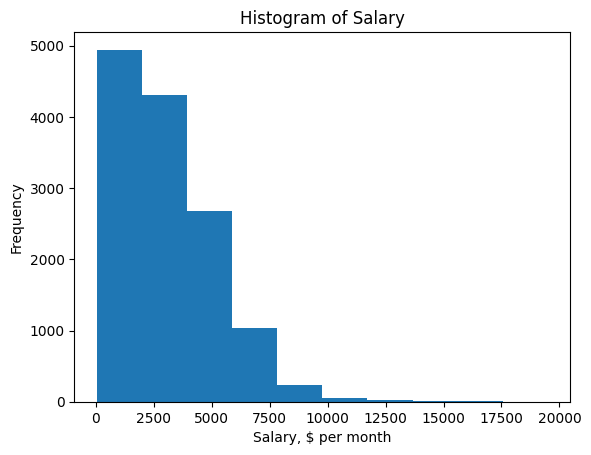

In [ ]:
dou['salary'].plot(kind='hist')
plt.xlabel('Salary, $ per month')
plt.title('Histogram of Salary')
plt.show()

Проаналізуємо 10 мінімальних та 10 максимальних значень зарплат у датасеті. Можливо, такі дані містять помилки.

In [ ]:
min_10_salaries = dou['salary'].nsmallest(10)
dou[dou['salary'].isin(min_10_salaries)].sort_values('salary')

,employment_type,in_ukraine,region,salary,gender,age,education,scientific_degree,english_level,position,title,use_code,programming_language,specialization,area,company_type,work_experience,positions_info,specialization_info
Timestamp,,,,,,,,,,,,,,,,,,,
2022-12-13 12:46:46,"Так, працюю part-time",True,Харків чи область,50.0,Чоловік,42.0,Середня спеціальна,Немає,Elementary,HTML Coder,Junior,True,PHP,Full Stack розробка,"E-commerce, Edtech / Education",Продуктова,7.00,NaN,NaN
2022-12-10 10:15:00,"Так, працюю full-time",True,Київ чи область,80.0,Жінка,29.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Pre-Intermediate,"Marketing, SEO, Copywriter",Немає тайтлу,<NA>,NaN,NaN,E-commerce,Продуктова,2.00,SMM Manager,NaN
2022-11-30 11:54:02,"Так, працюю full-time",True,Вінниця чи область,100.0,Чоловік,19.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Upper-Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",Intern/Trainee,<NA>,C# / .NET,Full Stack розробка,"E-commerce, High Load Systems",Аутстафінгова,0.00,NaN,NaN
2022-12-06 16:19:00,"Так, працюю full-time",True,Вінниця чи область,100.0,Чоловік,18.0,Середня спеціальна,Немає,Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",Intern/Trainee,<NA>,Java,Back-end розробка,"Media, Інша",Аутсорсингова,0.50,NaN,NaN
2022-12-10 00:08:00,"Ні, тимчасово не працюю",True,Київ чи область,100.0,Чоловік,21.0,Ще студент вишу,Немає,Intermediate,"Data Science, Machine Learning, Big Data",Intern/Trainee,True,Python,"Робота з даними, аналіз даних",Big Data,Інша,0.00,Data Engineer / Big Data Engineer,NaN
2022-12-12 16:52:00,"Так, працюю full-time",True,Дніпро чи область,100.0,Чоловік,28.0,Середня спеціальна,Немає,Elementary,"Software Engineer (Junior, Middle, Senior, Tea...",Junior,<NA>,JavaScript,Front-end розробка,E-commerce,Продуктова,2.00,NaN,NaN
2022-12-27 17:07:38,"Так, працюю full-time",True,Полтава чи область,100.0,Чоловік,14.0,Середня,NaN,Pre-Intermediate,HTML Coder,Немає тайтлу,True,JavaScript,Front-end розробка,Інша,Інша,0.00,NaN,NaN
2022-12-03 14:21:00,"Так, працюю full-time",True,Полтава чи область,130.0,Чоловік,31.0,Дві вищі,Немає,Pre-Intermediate,"QA Engineer (Junior, Middle, Senior, Team/Tech...",Intern/Trainee,False,NaN,NaN,Інша,Інша,0.25,NaN,Manual QA
2022-12-12 19:07:00,"Ні, тимчасово не працюю",True,Тернопіль чи область,130.0,Чоловік,33.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Pre-Intermediate,"QA Engineer (Junior, Middle, Senior, Team/Tech...",Junior,True,Python,QA,Інша,Продуктова,10.00,NaN,Manual QA


In [ ]:
top_10_salaries = dou['salary'].nlargest(10)
dou[dou['salary'].isin(top_10_salaries)].sort_values('salary', ascending=False)

,employment_type,in_ukraine,region,salary,gender,age,education,scientific_degree,english_level,position,title,use_code,programming_language,specialization,area,company_type,work_experience,positions_info,specialization_info
Timestamp,,,,,,,,,,,,,,,,,,,
2022-12-01 14:33:00,"Так, працюю full-time",False,NaN,19500.0,Чоловік,28.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Upper-Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",Architect,<NA>,Java,Back-end розробка,"Big Data, Internet of Things, Security",Аутсорсингова,8.0,NaN,NaN
2022-12-01 17:37:00,"Так, працюю full-time",False,NaN,17000.0,Чоловік,33.0,Дві вищі,Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",Senior,<NA>,C,Back-end розробка,Embedded,Продуктова,9.0,NaN,NaN
2022-11-30 11:42:58,"Так, працюю full-time",True,Київ чи область,16000.0,Чоловік,32.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Upper-Intermediate,"DevOps, SRE",Senior,False,NaN,NaN,"Data Science, Media",Продуктова,9.0,DevOps Engineer,NaN
2022-11-30 16:55:10,"Так, працюю full-time",False,NaN,16000.0,Чоловік,32.0,Дві вищі,Немає,Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",Senior,<NA>,JavaScript,Front-end розробка,"Blockchain, Fintech / Banking",Стартап,10.0,NaN,NaN
2022-12-06 23:34:00,"Так, працюю full-time",True,Київ чи область,16000.0,Чоловік,32.0,Середня,Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",Architect,<NA>,Не можу обрати одну основну мову,Full Stack розробка,"Cloud Computing, Fintech / Banking, High Load ...",Продуктова,15.0,NaN,NaN
2022-12-10 14:26:00,"Так, працюю full-time",False,NaN,14687.0,Чоловік,33.0,Середня спеціальна,Немає,Advanced,"Designer / Artist (Graphic, UX/UI, Game, Artis...",Немає тайтлу,<NA>,NaN,NaN,Hardware,Стартап,10.0,NaN,Product Designer
2022-12-02 19:46:00,"Так, працюю full-time",False,NaN,14500.0,Чоловік,41.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Upper-Intermediate,"DevOps, SRE",Tech Lead,False,NaN,NaN,"Cloud Computing, Fintech / Banking",Аутстафінгова,8.0,Site Reliability Engineer,NaN
2022-11-30 16:50:46,"Так, працюю full-time",True,Львів чи область,14000.0,Чоловік,25.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",Head,<NA>,TypeScript,Full Stack розробка,"Big Data, Blockchain",Продуктова,10.0,NaN,NaN
2022-12-01 12:28:00,"Так, працюю full-time",True,Київ чи область,14000.0,Чоловік,25.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Upper-Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",Senior,<NA>,JavaScript,Front-end розробка,E-commerce,Аутстафінгова,7.0,NaN,NaN


Тепер проаналізуємо пропущені дані.

In [ ]:
# % пропущених значень у колонці "зарплата"
dou['salary'].isnull().sum() / dou.shape[0] * 100

0.20277882087870822

In [ ]:
dou[dou['salary'].isnull()]

,employment_type,in_ukraine,region,salary,gender,age,education,scientific_degree,english_level,position,title,use_code,programming_language,specialization,area,company_type,work_experience,positions_info,specialization_info
Timestamp,,,,,,,,,,,,,,,,,,,
2022-11-30 10:26:39,"Так, працюю full-time",False,NaN,NaN,Чоловік,36.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",Middle,<NA>,Ruby,Full Stack розробка,Public services / Government,Продуктова,3.0,NaN,NaN
2022-11-30 10:28:00,"Так, працюю full-time",False,NaN,NaN,Чоловік,17.0,Ще студент вишу,Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",Middle,<NA>,C# / .NET,Full Stack розробка,Інша,Аутсорсингова,2.0,NaN,NaN
2022-11-30 10:30:00,"Так, працюю full-time",False,NaN,NaN,Чоловік,22.0,Ще студент вишу,Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",Middle,<NA>,Rust,Back-end розробка,Blockchain,Продуктова,2.0,NaN,NaN
2022-11-30 10:30:30,"Так, працюю full-time",False,NaN,NaN,Жінка,26.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Upper-Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",Middle,<NA>,TypeScript,Front-end розробка,E-commerce,Аутстафінгова,2.0,NaN,NaN
2022-11-30 10:30:53,"Так, працюю full-time",False,NaN,NaN,Чоловік,22.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Upper-Intermediate,Sales Manager,Manager,<NA>,NaN,NaN,Adtech / Advertising,Продуктова,1.5,NaN,NaN
2022-11-30 10:34:00,"Так, працюю full-time",False,NaN,NaN,Чоловік,21.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Upper-Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",Middle,<NA>,Python,Back-end розробка,Travel,Продуктова,3.0,NaN,NaN
2022-11-30 10:35:35,"Так, працюю full-time",False,NaN,NaN,Чоловік,34.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",Senior,<NA>,Kotlin,Mobile розробка,ERP,Аутсорсингова,10.0,NaN,NaN
2022-11-30 10:36:24,"Так, працюю full-time",False,NaN,NaN,Чоловік,28.0,Дві вищі,Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",Senior,<NA>,C# / .NET,Back-end розробка,E-commerce,Аутсорсингова,6.0,NaN,NaN
2022-11-30 10:36:56,"Так, працюю full-time",False,NaN,NaN,Жінка,37.0,"Вища (бакалавр, спеціаліст, магістр)",Немає,Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",Middle,<NA>,SQL,Full Stack розробка,Retail,Продуктова,10.0,NaN,NaN


Так як відсоток пропущених значень невеликий, можемо просто видалити відповідні рядки з датафрейму. Користаємось методом `dropna()`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html 

In [ ]:
dou = dou.dropna(subset=['salary'])
dou.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13288 entries, 2022-11-30 10:26:37 to 2023-01-09 11:38:00
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employment_type       13288 non-null  object 
 1   in_ukraine            13288 non-null  bool   
 2   region                11538 non-null  object 
 3   salary                13288 non-null  float64
 4   gender                13288 non-null  object 
 5   age                   13288 non-null  float64
 6   education             13288 non-null  object 
 7   scientific_degree     13177 non-null  object 
 8   english_level         13288 non-null  object 
 9   position              13288 non-null  object 
 10  title                 13288 non-null  object 
 11  use_code              4874 non-null   boolean
 12  programming_language  9035 non-null   object 
 13  specialization        9034 non-null   object 
 14  area                  13288 non-nul

Метод `describe()` можна застосовувати до декількох колонок одразу, або навіть до всього датасету.

In [ ]:
dou[['age', 'work_experience']].describe()

,age,work_experience
count,13288.000000,13288.000000
mean,29.321004,4.813855
std,6.032051,3.797783
min,14.000000,0.000000
25%,25.000000,2.000000
50%,29.000000,4.000000
75%,33.000000,7.000000
max,63.000000,15.000000


Для первинної аналітики розподілу категоріальної змінної доцільно скористатися методом `value_counts()`, показавши у тому числі пропущені дані.

In [ ]:
dou['programming_language'].value_counts(dropna=False)

NaN                                        4253
JavaScript                                 1692
Java                                       1237
Python                                     1188
C# / .NET                                  1176
TypeScript                                 1175
PHP                                         624
Kotlin                                      285
C++                                         251
Swift                                       221
SQL                                         200
Go                                          165
Ruby                                        157
Інша мова                                   127
Dart                                         96
Scala                                        72
Salesforce Apex                              59
C                                            58
Не можу обрати одну основну мову             57
1С                                           38
Мови розробки БД (PL/SQL, Transact-SQL) 

Для візуалізації розподілу значень категоріальної змінної користуємось стовпчиковою діаграмою (bar chart, bar plot).

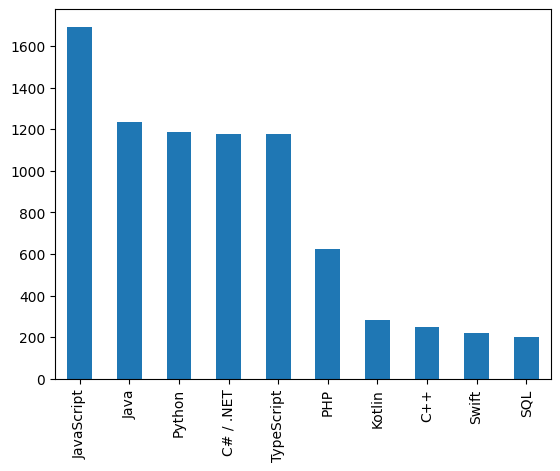

In [ ]:
dou['programming_language'].value_counts().head(10).plot(kind='bar')
plt.show()

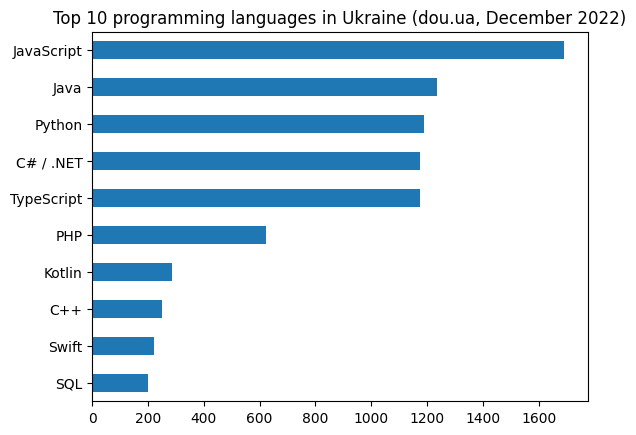

In [ ]:
dou['programming_language'].value_counts().head(10).sort_values().plot(kind='barh')
plt.title('Top 10 programming languages in Ukraine (dou.ua, December 2022)')
plt.show()

## Агрегування даних. Зведені таблиці

Для агрегування даних у Pandas існують два способи:
* GROUP BY (нагадує відповідну операцію SQL);
* зведені таблиці (pivot tables, нагадує відповідну операцію в електронних таблицях).

### GROUP BY

Стаття з документації бібліотеки: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

Стаття з підручника: https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html

Наведемо для початку простий приклад застосування GROUP BY: виведемо **медіанну зарплату** для кожного з **рівнів володіння англійською мовою**.

Отже, у даному випадку в нас одна категоріальна змінна для групування (`english_level`) та одна змінна для агрегування значень (`salary`), до якої застосовуємо агрегатну функцію `median`.

In [ ]:
dou.groupby('english_level')['salary'].median().sort_values(ascending=False)

english_level
Advanced              3500.0
Upper-Intermediate    3300.0
Intermediate          2125.0
Pre-Intermediate      1404.0
Elementary            1155.0
Name: salary, dtype: float64

Візуалізувати результат GROUP BY можна за допомогою bar chart.

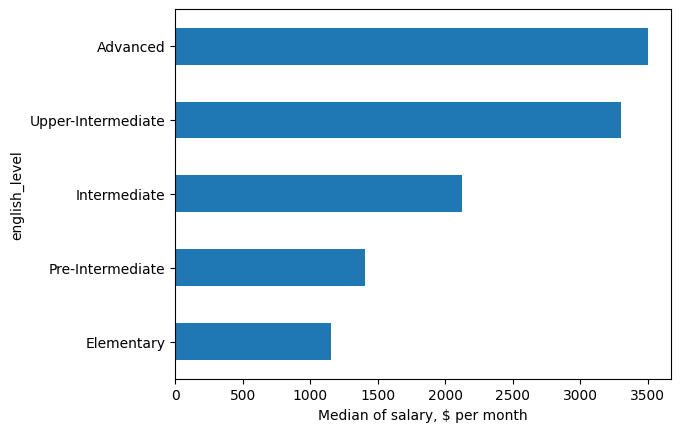

In [ ]:
dou.groupby('english_level')['salary'].median().sort_values().plot(kind='barh')
plt.xlabel('Median of salary, $ per month')
plt.show()

Ми можемо застосовувати декілька агрегатних функцій для кожної групи. У такому випадку перелічуємо їх як список у методі `agg` (або `aggregate`). Знайдемо мінімальну, максимальну та медіанну зарплату для кожного рівня англійської.

In [ ]:
dou.groupby('english_level')['salary'].agg(['min', 'median', 'max'])

,min,median,max
english_level,,,
Advanced,160.0,3500.0,17000.0
Elementary,50.0,1155.0,10000.0
Intermediate,100.0,2125.0,16000.0
Pre-Intermediate,80.0,1404.0,8500.0
Upper-Intermediate,100.0,3300.0,19500.0


In [ ]:
dou.groupby('english_level')['salary'].agg(['min', 'median', 'max']).sort_values('median', ascending=False)

,min,median,max
english_level,,,
Advanced,160.0,3500.0,17000.0
Upper-Intermediate,100.0,3300.0,19500.0
Intermediate,100.0,2125.0,16000.0
Pre-Intermediate,80.0,1404.0,8500.0
Elementary,50.0,1155.0,10000.0


Операцію групування можна робити таким чином, щоб агрегування відбувалося за декількома колонками. До кожної колонки при цьому можна застососувати свою агрегатну функцію.

Обчислимо середній досвід роботи та медіанну зарплату для кожного з тайтлів співробітників.

In [ ]:
group_by_title = dou.groupby('title')[['work_experience', 'salary']].agg({'work_experience': 'mean', 
                                                                          'salary': 'median'}).sort_values('salary', ascending=False)
np.round(group_by_title)

,work_experience,salary
title,,
Architect,10.0,6400.0
Tech Lead,9.0,5500.0
Senior,7.0,4500.0
Team Lead,7.0,4400.0
Head,7.0,4000.0
Manager,6.0,3200.0
Middle,4.0,2300.0
Немає тайтлу,4.0,1500.0
Junior,2.0,900.0


In [ ]:
group_by_title = dou.groupby('title')[['work_experience', 'salary']].agg({'work_experience': [np.min, np.mean, np.max], 
                                                                          'salary': 'median'})
np.round(group_by_title)

work_experience              salary
                          amin  mean  amax  median
title                                             
Architect                  0.0  10.0  15.0  6400.0
Head                       0.0   7.0  15.0  4000.0
Intern/Trainee             0.0   1.0  15.0   450.0
Junior                     0.0   2.0  15.0   900.0
Manager                    0.0   6.0  15.0  3200.0
Middle                     0.0   4.0  15.0  2300.0
Senior                     0.0   7.0  15.0  4500.0
Team Lead                  0.0   7.0  15.0  4400.0
Tech Lead                  0.0   9.0  15.0  5500.0
Немає тайтлу               0.0   4.0  15.0  1500.0

In [ ]:
group_by_title.columns

MultiIndex([('work_experience',   'amin'),
            ('work_experience',   'mean'),
            ('work_experience',   'amax'),
            (         'salary', 'median')],
           )

In [ ]:
group_by_title = dou.groupby('title')[['work_experience', 'salary']].agg({'work_experience': [np.min, np.mean, np.max], 
                                                                          'salary': 'median'}).sort_values(('salary', 'median'), ascending=False)
np.round(group_by_title)

work_experience              salary
                          amin  mean  amax  median
title                                             
Architect                  0.0  10.0  15.0  6400.0
Tech Lead                  0.0   9.0  15.0  5500.0
Senior                     0.0   7.0  15.0  4500.0
Team Lead                  0.0   7.0  15.0  4400.0
Head                       0.0   7.0  15.0  4000.0
Manager                    0.0   6.0  15.0  3200.0
Middle                     0.0   4.0  15.0  2300.0
Немає тайтлу               0.0   4.0  15.0  1500.0
Junior                     0.0   2.0  15.0   900.0
Intern/Trainee             0.0   1.0  15.0   450.0

Нарешті, можемо робити групування за декількома категоріями, у такому випадку перелічуємо ці категорії у вигляді списку.

Подивимось на медіанні зарплати розробників та тестувальників по кожному тайтлу.

In [ ]:
programmers_qa = dou['position'].value_counts().head(2).index
print(programmers_qa)

Index(['Software Engineer (Junior, Middle, Senior, Team/Tech Lead, Architect)', 'QA Engineer (Junior, Middle, Senior, Team/Tech Lead, Manager)'], dtype='object')


In [ ]:
dou[dou['position'].isin(programmers_qa)].groupby(['title', 'position'])['salary'].median()

title           position                                                             
Architect       QA Engineer (Junior, Middle, Senior, Team/Tech Lead, Manager)            5625.0
                Software Engineer (Junior, Middle, Senior, Team/Tech Lead, Architect)    6500.0
Head            QA Engineer (Junior, Middle, Senior, Team/Tech Lead, Manager)            4850.0
                Software Engineer (Junior, Middle, Senior, Team/Tech Lead, Architect)    5612.5
Intern/Trainee  QA Engineer (Junior, Middle, Senior, Team/Tech Lead, Manager)             475.0
                Software Engineer (Junior, Middle, Senior, Team/Tech Lead, Architect)     450.0
Junior          QA Engineer (Junior, Middle, Senior, Team/Tech Lead, Manager)             800.0
                Software Engineer (Junior, Middle, Senior, Team/Tech Lead, Architect)    1000.0
Manager         QA Engineer (Junior, Middle, Senior, Team/Tech Lead, Manager)            4000.0
                Software Engineer (Junior, Middle,

In [ ]:
dou[dou['position'].isin(programmers_qa)].groupby(['title', 'position'])['salary'].median().index

MultiIndex([(     'Architect', ...),
            (     'Architect', ...),
            (          'Head', ...),
            (          'Head', ...),
            ('Intern/Trainee', ...),
            ('Intern/Trainee', ...),
            (        'Junior', ...),
            (        'Junior', ...),
            (       'Manager', ...),
            (       'Manager', ...),
            (        'Middle', ...),
            (        'Middle', ...),
            (        'Senior', ...),
            (        'Senior', ...),
            (     'Team Lead', ...),
            (     'Team Lead', ...),
            (     'Tech Lead', ...),
            (     'Tech Lead', ...)],
           names=['title', 'position'])

###  Зведені таблиці (pivot tables)

Стаття з документації: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

Стаття з підручника: https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html

Зведені таблиці, так само як і GROUP BY, дозволяють обчислювати агрегатні функції за категоріями. Але при цьому категорії можна розташовувати як у рядках (параметр `index`), так і у стовпчиках (параметр `columns`). Колонка, за якою обчислюється агрегатна функція по кожній групі, передається у параметрі `values`, а сама агрегатна функція --- у параметрі `aggfunc`). 

Оформимо попередній приклад з розробниками та тестувальниками у вигляді зведеної таблиці.

In [ ]:
dou[dou['position'].isin(programmers_qa)].pivot_table(index='title',
                                                      columns='position',
                                                      values='salary',
                                                      aggfunc='median')

position,"QA Engineer (Junior, Middle, Senior, Team/Tech Lead, Manager)","Software Engineer (Junior, Middle, Senior, Team/Tech Lead, Architect)"
title,,
Architect,5625.0,6500.0
Head,4850.0,5612.5
Intern/Trainee,475.0,450.0
Junior,800.0,1000.0
Manager,4000.0,6600.0
Middle,1850.0,2600.0
Senior,3400.0,5000.0
Team Lead,3500.0,5100.0
Tech Lead,4400.0,5875.0


In [ ]:
dou[dou['position'].isin(programmers_qa)].pivot_table(index='title',
                                                      columns='position',
                                                      values='salary',
                                                      aggfunc='median').rename(columns={'QA Engineer (Junior, Middle, Senior, Team/Tech Lead, Manager)': 'QA',
                                                                                        'Software Engineer (Junior, Middle, Senior, Team/Tech Lead, Architect)': 'Programmers'})

position,QA,Programmers
title,,
Architect,5625.0,6500.0
Head,4850.0,5612.5
Intern/Trainee,475.0,450.0
Junior,800.0,1000.0
Manager,4000.0,6600.0
Middle,1850.0,2600.0
Senior,3400.0,5000.0
Team Lead,3500.0,5100.0
Tech Lead,4400.0,5875.0


Обчислимо тепер медіанну зарплату для кожного тайтла та для кожного рівня володіння англійською для цього тайтла.

In [ ]:
dou.pivot_table(index='title', columns='english_level', values='salary', aggfunc=np.median)

english_level,Advanced,Elementary,Intermediate,Pre-Intermediate,Upper-Intermediate
title,,,,,
Architect,7000.0,NaN,5450.0,2900.0,6400.0
Head,5000.0,1500.0,3500.0,2400.0,4000.0
Intern/Trainee,500.0,500.0,400.0,400.0,485.0
Junior,1000.0,600.0,900.0,800.0,1000.0
Manager,4000.0,1120.0,2100.0,1225.0,3600.0
Middle,2500.0,1500.0,2200.0,1825.0,2500.0
Senior,4750.0,2500.0,4100.0,3500.0,4750.0
Team Lead,5000.0,2100.0,3800.0,2850.0,4655.0
Tech Lead,6000.0,5000.0,5000.0,4000.0,5650.0


Для зміни порядку слідування груп у рядках та стовпчиках можемо скористатись методом `reindex()` із параметром `axis`.

In [ ]:
english_order = ['Elementary', 'Pre-Intermediate', 'Intermediate', 'Upper-Intermediate', 'Advanced']
title_order = dou.groupby('title')['salary'].median().sort_values(ascending=False).index
df_pivot = dou.pivot_table(index='title', columns='english_level', values='salary', aggfunc=np.median)
df_pivot.reindex(english_order, axis=1).reindex(title_order, axis=0)

english_level,Elementary,Pre-Intermediate,Intermediate,Upper-Intermediate,Advanced
title,,,,,
Architect,NaN,2900.0,5450.0,6400.0,7000.0
Tech Lead,5000.0,4000.0,5000.0,5650.0,6000.0
Senior,2500.0,3500.0,4100.0,4750.0,4750.0
Team Lead,2100.0,2850.0,3800.0,4655.0,5000.0
Head,1500.0,2400.0,3500.0,4000.0,5000.0
Manager,1120.0,1225.0,2100.0,3600.0,4000.0
Middle,1500.0,1825.0,2200.0,2500.0,2500.0
Немає тайтлу,550.0,934.0,1300.0,1600.0,2075.0
Junior,600.0,800.0,900.0,1000.0,1000.0


Візуалізуємо отриманий результат за допомогою теплової карти (скористаємось діаграмою `heatmap` бібліотеки `seaborn`).

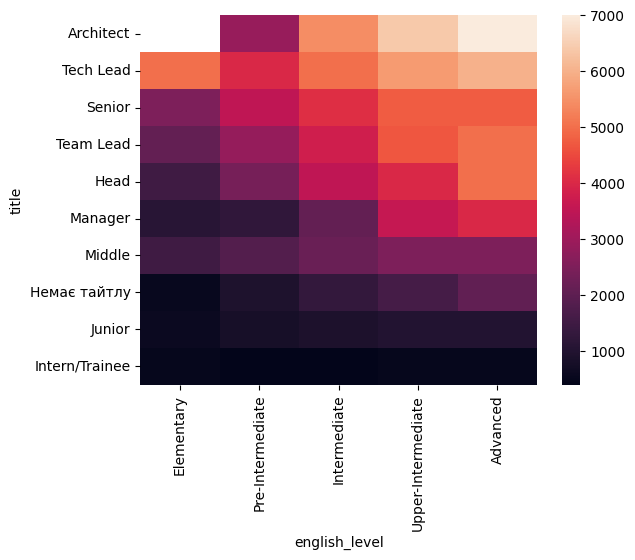

In [ ]:
sns.heatmap(df_pivot.reindex(english_order, axis=1).reindex(title_order, axis=0))
plt.show()